# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [137]:
#dependencies
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import scipy.stats as sts


from pprint import pprint
from config import api_key
from citipy import citipy

print(api_key)

aad29af8ad8465da8fc4785fb3164b34


## Generate Cities List

In [241]:
# generate cities as needed 
import random

lat = []
long = []

for x in range(600):
    lat.append(round(random.uniform(-90,90),2))
    long.append(round(random.uniform(-180,180),2))

#print(lat)

city_loc_df = {
    "lat" : lat,
    "long" : long
}

city_df = pd.DataFrame(city_loc_df)

city_df.head()


,lat,long
0,-41.14,-32.57
1,8.03,-137.88
2,-79.46,131.76
3,-2.74,-66.05
4,30.23,-50.84


In [242]:
#convert random lat and Long into city names via citipy nearest_city
from citipy import citipy

city_name =[]
city_country = []


for row in range(len(city_df)):
    lati = city_df['lat'][row]
    longi =city_df['long'][row]
    
    city = citipy.nearest_city(lati,longi)
    city_name.append(city.city_name)
    city_country.append(city.country_code)
    
city_loc_df['Name'] = city_name
city_loc_df['Country'] = city_country

city_df = pd.DataFrame(city_loc_df)
city_df

,lat,long,Name,Country
0,-41.14,-32.57,arraial do cabo,br
1,8.03,-137.88,atuona,pf
2,-79.46,131.76,new norfolk,au
3,-2.74,-66.05,fonte boa,br
4,30.23,-50.84,saint george,bm
...,...,...,...,...
595,89.27,-90.78,qaanaaq,gl
596,-21.34,83.82,hithadhoo,mv
597,-18.55,-32.70,caravelas,br
598,-22.93,96.15,carnarvon,au


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [243]:
#take city data and use Google API to find city data

#url basic point  api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = f'api.openweathermap.org/data/2.5/weather?q='
key = api_key

max_temp =[]
humidity = []
cloudiness = []
wind_speed = []
date_rec = []

for row in range(len(city_df)):
   
    city_qname =  city_df['Name'][row] 
    print(city_qname)
    query_url = f'http://{url}{city_qname}&units=imperial&appid={key}'
    print(query_url)
    try:
        data = requests.get(query_url).json()
        #print(f'Successful request {row}: for city {city_qname}')
        #print(city_name[row], max_temp, humidity, cloudiness, wind_speed)
        #pprint(data)
        max_temp.append(float(data['main']['temp_max']))
        humidity.append(float(data['main']['humidity']))
        cloudiness.append(float(data['clouds']['all']))
        wind_speed.append(float(data['wind']['speed']))
        date_rec.append(int(data['dt']))
    except: 
        #print(f'Unsuccessful request {row}: for city {city_qname}')
        max_temp.append("NA")
        humidity.append("NA")
        cloudiness.append("NA")
        wind_speed.append("NA")
        date_rec.append("NA")
        
city_loc_df['Max temp'] = max_temp
city_loc_df['Humidity'] = humidity        
city_loc_df['Cloudiness'] = cloudiness    
city_loc_df['Wind Speed'] = wind_speed    
city_loc_df['Date Rec'] = date_rec  

city2_df = pd.DataFrame(city_loc_df)
city2_df.head()

arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
new norfolk
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
fonte boa
http://api.openweathermap.org/data/2.5/weather?q=fonte boa&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
saint george
http://api.openweathermap.org/data/2.5/weather?q=saint george&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
ch

pevek
http://api.openweathermap.org/data/2.5/weather?q=pevek&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
middelburg
http://api.openweathermap.org/data/2.5/weather?q=middelburg&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
dikson
http://api.openweathermap.org/data/2.5/weather?q=dikson&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
pevek
http://api.openweathermap.org/data/2.5/weather?q=pevek&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?q=kasongo-lunda&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
cartagena
http://api.openweathermap.org/data/2.5/weather?q=cartagena&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
tuatapere
http://api.openweatherma

bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
constitucion
http://api.openweathermap.org/data/2.5/weather?q=constitucion&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar del plata&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=imperial&appid=aad29af8ad8465da8fc

atocha
http://api.openweathermap.org/data/2.5/weather?q=atocha&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
sambava
http://api.openweathermap.org/data/2.5/weather?q=sambava&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
krasnaya gorka
http://api.openweathermap.org/data/2.5/weather?q=krasnaya gorka&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
thompson
http://api.openwe

jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
nesbyen
http://api.openweathermap.org/data/2.5/weather?q=nesbyen&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
belmonte
http://api.openweathermap.org/data/2.5/weather?q=belmonte&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
chapais
http://api.openweathermap.org/data/2.5/weather?q=chapais&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
coihueco
http://api.openweatherm

sao filipe
http://api.openweathermap.org/data/2.5/weather?q=sao filipe&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
mangrol
http://api.openweathermap.org/data/2.5/weather?q=mangrol&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
benguela
http://api.openweathermap.org/data/2.5/weather?q=benguela&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
saskylakh
http://api.openwea

ust-shonosha
http://api.openweathermap.org/data/2.5/weather?q=ust-shonosha&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
san cristobal
http://api.openweathermap.org/data/2.5/weather?q=san cristobal&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
vaini
http://api.openweathermap.org/data/2.5/weather?q=vaini&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
raga
http://api.openweathermap.org/data/2.5/weather?q=raga&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
yatou
http://api.openweathermap.org/data/2.5/weather?q=yatou&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
bitung
http://api.openweatherm

campo verde
http://api.openweathermap.org/data/2.5/weather?q=campo verde&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
coahuayana
http://api.openweathermap.org/data/2.5/weather?q=coahuayana&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
tambura
http://api.openweathermap.org/data/2.5/weather?q=tambura&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
faya
http://api.openweathermap.org/data/2.5/weather?q=faya&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
khonuu
http://api.openweathermap.org/data/2.5/weather?q=khonuu&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
amderma
http://api.openweathermap.org/data

taoudenni
http://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
changli
http://api.openweathermap.org/data/2.5/weather?q=changli&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
lukovit
http://api.openweathermap.org/data/2.5/weather?q=lukovit&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
maputo
http://api.openweathermap.org/data/2.5/weather?q=maputo&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
ixtapa
http://api.openweathermap.org/data/2.5/weather?q=ixtapa&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
taolanaro
http://api.openweathermap.org/

,lat,long,Name,Country,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
0,-41.14,-32.57,arraial do cabo,br,77,61,40,25.28,1602520854
1,8.03,-137.88,atuona,pf,78.19,75,33,16.37,1602520740
2,-79.46,131.76,new norfolk,au,52,70,93,5.01,1602520854
3,-2.74,-66.05,fonte boa,br,98.6,35,6,3.02,1602520854
4,30.23,-50.84,saint george,bm,60.8,26,1,3.36,1602520854


In [245]:
# reorder the columns
city2_df = city2_df[['Name','Country', 'lat', 'long', 'Max temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date Rec']]

print(len(city2_df))


600


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [299]:
# Clean table - drop NA, duplicate cities

city2_df.dropna(how='any',inplace=True)
city2_df.drop_duplicates()

len(city2_df)


558

In [300]:
#Display dataframe
city2_df

,Name,Country,lat,long,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
0,arraial do cabo,br,-41.14,-32.57,77.00,61.0,40.0,25.28,1602520854
1,atuona,pf,8.03,-137.88,78.19,75.0,33.0,16.37,1602520740
2,new norfolk,au,-79.46,131.76,52.00,70.0,93.0,5.01,1602520854
3,fonte boa,br,-2.74,-66.05,98.60,35.0,6.0,3.02,1602520854
4,saint george,bm,30.23,-50.84,60.80,26.0,1.0,3.36,1602520854
...,...,...,...,...,...,...,...,...,...
595,qaanaaq,gl,89.27,-90.78,34.41,88.0,100.0,4.05,1602520905
596,hithadhoo,mv,-21.34,83.82,82.31,72.0,100.0,11.50,1602520612
597,caravelas,br,-18.55,-32.70,74.95,78.0,100.0,8.46,1602520905
598,carnarvon,au,-22.93,96.15,68.00,94.0,90.0,16.11,1602520869


In [301]:
# confirm data types for future work, convert numbers to floats
city2_df['Max temp'] = pd.to_numeric(city2_df['Max temp'], errors='coerce')
city2_df['Humidity'] = pd.to_numeric(city2_df['Humidity'], errors='coerce')
city2_df['Cloudiness'] = pd.to_numeric(city2_df['Cloudiness'], errors='coerce')
city2_df['Wind Speed'] = pd.to_numeric(city2_df['Wind Speed'], errors='coerce')
city2_df.dtypes



Name           object
Country        object
lat           float64
long          float64
Max temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Date Rec       object
dtype: object

In [303]:
#Write city data to csv file

city2_df.to_csv(r'city_list_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [304]:
#check if Humidity >100%
city2_df['Humidity'].max()

100.0

In [305]:
# No cities have >100% humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

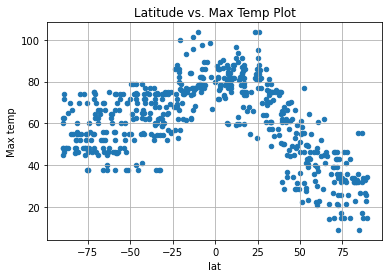

In [306]:
city2_df.plot(kind='scatter', x='lat', y='Max temp')
plt.title("Latitude vs. Max Temp Plot")
plt.grid()
plt.savefig("Lat_temp.png", bbox_inches="tight")

# Observations:
# temperatures peak around the equator (+/- 25 degrees lat)
# seemingly the max temp drops more going north for cities than going south
# which is interesting.  Something else is moderating temps in the southern hemisphere


## Latitude vs. Humidity Plot

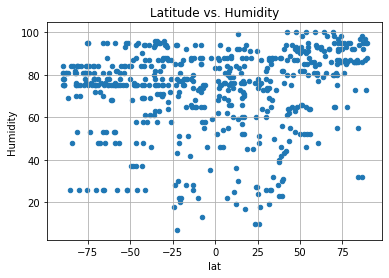

In [307]:
city2_df.plot(kind='scatter', x='lat', y='Humidity')
plt.title("Latitude vs. Humidity")
plt.grid()
plt.savefig("Lat_humidity.png", bbox_inches="tight")

# Observations:
# Humidity does not seem correlated with latitude
# the range of values at <-50 lat, is pretty much the range of values >50 lat 

## Latitude vs. Cloudiness Plot

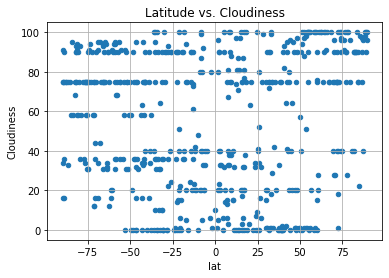

In [308]:
city2_df.plot(kind='scatter', x='lat', y='Cloudiness')
plt.title("Latitude vs. Cloudiness")
plt.grid()
plt.savefig("Lat_Cloudiness.png", bbox_inches="tight")

# Observations:
# Cloudiness doesn't seem correlated to latitude
# maybe a slight bias to higher cloud cover at the extremes in lat
# Quite a range of value per cities of like latitude

## Latitude vs. Wind Speed Plot

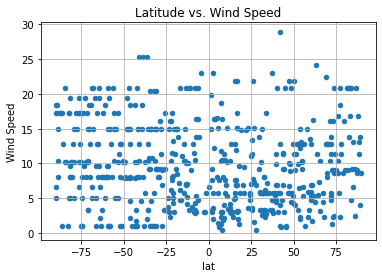

In [309]:
city2_df.plot(kind='scatter', x='lat', y='Wind Speed')
plt.title("Latitude vs. Wind Speed")
plt.grid()
plt.savefig("Lat_Wind.png", bbox_inches="tight")

# Observations:
# Wind Speed doesn't seem correlated to latitude
# a pretty thorough range across all latitudes

## Linear Regression

In [310]:
# Create Northern Hemisphere datatable
north_df = city2_df.loc[city2_df['lat'] >=0]
north_df

,Name,Country,lat,long,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
1,atuona,pf,8.03,-137.88,78.19,75.0,33.0,16.37,1602520740
4,saint george,bm,30.23,-50.84,60.80,26.0,1.0,3.36,1602520854
7,kapaa,us,33.62,-158.15,75.20,88.0,75.0,5.82,1602520854
8,chokurdakh,ru,73.95,144.03,17.24,98.0,97.0,2.46,1602520855
10,tezpur,in,26.79,92.83,76.89,87.0,6.0,1.54,1602520855
...,...,...,...,...,...,...,...,...,...
591,talnakh,ru,69.26,94.80,26.60,100.0,40.0,22.37,1602520644
592,tibati,cm,5.98,12.37,72.05,81.0,14.0,0.87,1602520905
594,hilo,us,31.92,-144.11,73.40,69.0,90.0,5.82,1602520879
595,qaanaaq,gl,89.27,-90.78,34.41,88.0,100.0,4.05,1602520905


In [311]:
# Create Southern Hemisphere datatable
south_df = city2_df.loc[city2_df['lat'] <0]
south_df.head()

,Name,Country,lat,long,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
0,arraial do cabo,br,-41.14,-32.57,77.0,61.0,40.0,25.28,1602520854
2,new norfolk,au,-79.46,131.76,52.0,70.0,93.0,5.01,1602520854
3,fonte boa,br,-2.74,-66.05,98.6,35.0,6.0,3.02,1602520854
5,ushuaia,ar,-71.52,-54.18,48.2,81.0,75.0,17.22,1602520854
6,saint-philippe,re,-71.32,72.09,75.2,78.0,12.0,3.36,1602520854


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [312]:
# linear regression model
from scipy.stats import linregress

results = linregress(north_df['Max temp'], north_df['lat'])

In [313]:
#regression values:
slope = results.slope
yinter = results.intercept

print(slope, yinter)

-0.9770250239787799 97.70574253117184


In [314]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = -0.98x + 97.71


In [315]:
# R^2 value
cor_lat_temp_nor = sts.pearsonr(north_df['Max temp'],north_df['lat'])
cor_lat_temp_nor[0]
r_sqre = cor_lat_temp_nor[0]*cor_lat_temp_nor[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

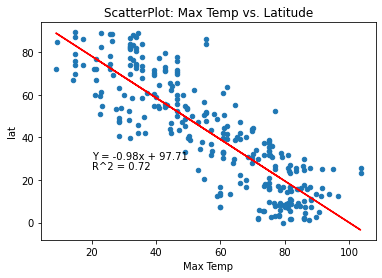

In [317]:
#plot chart with regression line
ax = north_df.plot.scatter(x = 'Max temp', y = 'lat')

ax.set_title('ScatterPlot: Max Temp vs. Latitude')
ax.set_xlabel('Max Temp')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(20,25), xytext=(20,30), fontsize=10)
ax.annotate(reg_form, xy=(20,25), xytext=(20,25), fontsize=10)

x_values = north_df['Max temp']
y_values = north_df['Max temp']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [318]:
results = linregress(south_df['Max temp'], south_df['lat'])

In [319]:
#regression values:
slope = results.slope
yinter = results.intercept

In [320]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = 1.08x + -115.27


In [321]:
# R^2 value
cor_lat_temp_sth = sts.pearsonr(south_df['Max temp'],south_df['lat'])
cor_lat_temp_sth[0]
r_sqre = cor_lat_temp_sth[0]*cor_lat_temp_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

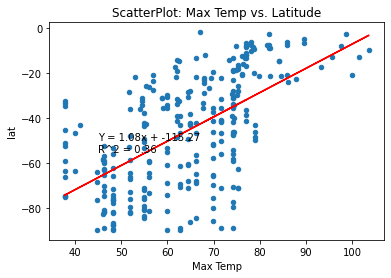

In [322]:
#plot chart with regression line
ax = south_df.plot.scatter(x = 'Max temp', y = 'lat')

ax.set_title('ScatterPlot: Max Temp vs. Latitude')
ax.set_xlabel('Max Temp')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(45,-50), xytext=(45,-50), fontsize=10)
ax.annotate(reg_form, xy=(45,-55), xytext=(45,-55), fontsize=10)

x_values = south_df['Max temp']
y_values = south_df['Max temp']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [323]:
# Linear Regression (temp vs. hemipshere lat)
# confirms that as the latitude is further away from zero
# the temperature drops fairly consistently in either direction
# the slope is inverted but the magntidue of the slope is quite similar
# .98 north vs. 1.08 South

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [324]:
results = linregress(north_df['Humidity'], north_df['lat'])

In [325]:
#regression values:
slope = results.slope
yinter = results.intercept

In [326]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = 0.40x + 11.93


In [327]:
# R^2 value
cor_lat_temp_north = sts.pearsonr(north_df['Humidity'],north_df['lat'])
cor_lat_temp_north[0]
r_sqre = cor_lat_temp_north[0]*cor_lat_temp_north[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

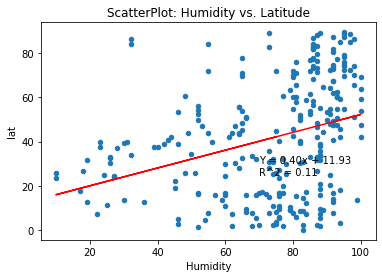

In [328]:
#plot chart with regression line
ax = north_df.plot.scatter(x = 'Humidity', y = 'lat')

ax.set_title('ScatterPlot: Humidity vs. Latitude')
ax.set_xlabel('Humidity')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(70,30), xytext=(70,30), fontsize=10)
ax.annotate(reg_form, xy=(70,25), xytext=(70,25), fontsize=10)

x_values = north_df['Humidity']
y_values = north_df['Humidity']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [329]:
results = linregress(south_df['Humidity'], south_df['lat'])

In [330]:
#regression values:
slope = results.slope
yinter = results.intercept

In [331]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = -0.14x + -35.67


In [332]:
# R^2 value
cor_lat_Humidity_sth = sts.pearsonr(south_df['Humidity'],south_df['lat'])
cor_lat_Humidity_sth[0]
r_sqre = cor_lat_Humidity_sth[0]*cor_lat_Humidity_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

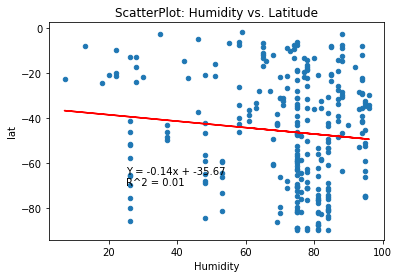

In [333]:
#plot chart with regression line
ax = south_df.plot.scatter(x = 'Humidity', y = 'lat')

ax.set_title('ScatterPlot: Humidity vs. Latitude')
ax.set_xlabel('Humidity')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(25,-65), xytext=(25,-65), fontsize=10)
ax.annotate(reg_form, xy=(25,-70), xytext=(25,-70), fontsize=10)

x_values = south_df['Humidity']
y_values = south_df['Humidity']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [334]:
# Observations:  Humidity vs. latitude by hemisphere
# NO meaningful R^2 here in either hemisphere.  .4 (magnitude) slope in the north vs. 0.14 slope in the south
# in general latitude has little value in predicting humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression eq: Y = 0.23x + 29.06


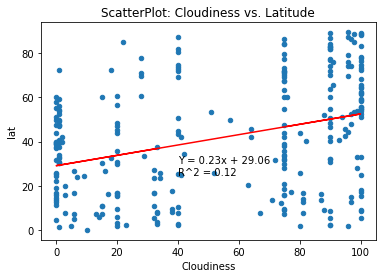

In [335]:
results = linregress(north_df['Cloudiness'], north_df['lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_Cloudiness_north = sts.pearsonr(north_df['Cloudiness'],north_df['lat'])
cor_lat_Cloudiness_north[0]
r_sqre = cor_lat_Cloudiness_north[0]*cor_lat_Cloudiness_north[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = north_df.plot.scatter(x = 'Cloudiness', y = 'lat')

ax.set_title('ScatterPlot: Cloudiness vs. Latitude')
ax.set_xlabel('Cloudiness')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(40,30), xytext=(40,30), fontsize=10)
ax.annotate(reg_form, xy=(40,25), xytext=(40,25), fontsize=10)

x_values = north_df['Cloudiness']
y_values = north_df['Cloudiness']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression eq: Y = -0.20x + -35.00


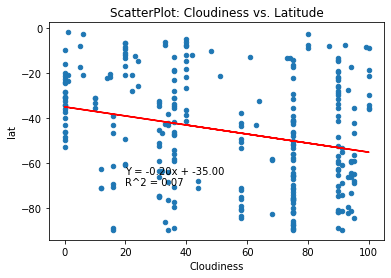

In [336]:
results = linregress(south_df['Cloudiness'], south_df['lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_Cloudiness_sth = sts.pearsonr(south_df['Cloudiness'],south_df['lat'])
cor_lat_Cloudiness_sth[0]
r_sqre = cor_lat_Cloudiness_sth[0]*cor_lat_Cloudiness_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = south_df.plot.scatter(x = 'Cloudiness', y = 'lat')

ax.set_title('ScatterPlot: Cloudiness vs. Latitude')
ax.set_xlabel('Cloudiness')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(20,-65), xytext=(20,-65), fontsize=10)
ax.annotate(reg_form, xy=(20,-70), xytext=(20,-70), fontsize=10)

x_values = south_df['Cloudiness']
y_values = south_df['Cloudiness']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [337]:
# Observations:  Cloudiness vs. latitude by hemisphere
# NO meaningful R^2 here in either hemisphere.  
#.23 (magnitude) slope in the north vs. 0.2 slope in the south is fairly equal
# in general latitude has no relationship with cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression eq: Y = 0.88x + 33.88


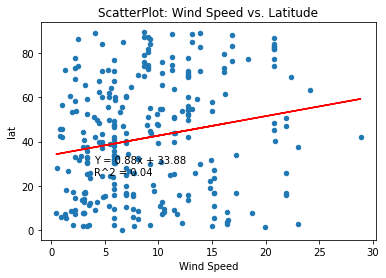

In [338]:
results = linregress(north_df['Wind Speed'], north_df['lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_wind_north = sts.pearsonr(north_df['Wind Speed'],north_df['lat'])
cor_lat_wind_north[0]
r_sqre = cor_lat_wind_north[0]*cor_lat_wind_north[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = north_df.plot.scatter(x = 'Wind Speed', y = 'lat')

ax.set_title('ScatterPlot: Wind Speed vs. Latitude')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(4,30), xytext=(4,30), fontsize=10)
ax.annotate(reg_form, xy=(4,25), xytext=(4,25), fontsize=10)

x_values = north_df['Wind Speed']
y_values = north_df['Wind Speed']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression eq: Y = -0.44x + -41.21


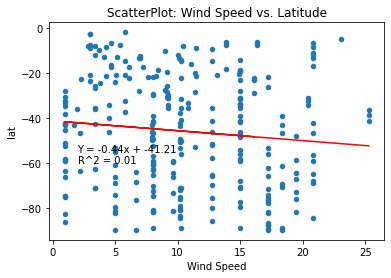

In [339]:
results = linregress(south_df['Wind Speed'], south_df['lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_wind_sth = sts.pearsonr(south_df['Wind Speed'],south_df['lat'])
cor_lat_wind_sth[0]
r_sqre = cor_lat_wind_sth[0]*cor_lat_wind_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = south_df.plot.scatter(x = 'Wind Speed', y = 'lat')

ax.set_title('ScatterPlot: Wind Speed vs. Latitude')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(2,-55), xytext=(2,-55), fontsize=10)
ax.annotate(reg_form, xy=(2,-60), xytext=(2,-60), fontsize=10)

x_values = south_df['Wind Speed']
y_values = south_df['Wind Speed']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [340]:
# Observations:  Wind Speed vs. latitude by hemisphere
# NO meaningful R^2 here in either hemisphere.  
#.88 (magnitude) slope in the north is double the south but the poor fit
# suggests this is not meaningufl
# in general latitude has no relationship with Wind Speed